In [66]:
Created on Sat Feb 20 18:55:32 2021

@author: Smita Shah
"""
# Task 1: Understand the Problem Statement 
# Task 2: Import Libraries and data-sets
# Task 3: Perform Exploratory Data Analysis
# Task 4: Perform Data Visualization
# Task 5: Create Training And Testing Datasets
# Task 6: Train And Evaluate A Linear Regression Model
# Task 7: Train And Evaluate an Artificial Neural Networks Model
# Task 8: Train And Evaluate A Random Forest and Decision Tree Regressors
# Task 9: Understand the difference between regression KPIs
# Task 10: Calculate regression model KPIs    


SyntaxError: invalid syntax (<ipython-input-66-34f88265f575>, line 1)

In [67]:
# Task 2: Import Libraries and data-sets
import os
os.getcwd()
os.chdir("F:\\avjobhackathon_practice")
os.getcwd()

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Import library for VIF   checking multicolinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np
import seaborn as sns
sns.set( palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


pd.set_option('max_columns', None)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
pd.set_option('display.max_columns',500)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('error',category=statsmodels.tools.sm_exceptions.HessianInversionWarning)
warnings.filterwarnings('error',category=statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings('error',category=RuntimeWarning)
warnings.filterwarnings('ignore',category=UserWarning)



In [68]:
#READ DATA start====================
try:
    train = pd.read_csv('train_v9rqX0R.csv')
    print("train dataset has {} samples with {} features each.".format(*train.shape))
    test = pd.read_csv('test_AbJTz2l.csv')
    print("test dataset has {} samples with {} features each.".format(*test.shape))
    sub = pd.read_csv('sample_submission_8RXa3c6.csv')
    print("submission dataset has {} samples with {} features each.".format(*sub.shape))
  
except:
    print("Dataset could not be loaded. Is the dataset missing?")
#READ DATA :END======================
# 

train dataset has 8523 samples with 12 features each.
test dataset has 5681 samples with 11 features each.
submission dataset has 5681 samples with 3 features each.


In [69]:
# Task 3: Perform Exploratory Data Analysis
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [70]:
train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [71]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [72]:
#checking outliner count
train['Item_Visibility'][train['Item_Visibility']==train['Item_Visibility'].max()]
#only one record no 854 854   0.328


854   0.328
Name: Item_Visibility, dtype: float64

In [73]:
train['Item_Outlet_Sales'][train['Item_Outlet_Sales']==train['Item_Outlet_Sales'].max()]
#only one record no 7188   13086.965
#

7188   13086.965
Name: Item_Outlet_Sales, dtype: float64

In [74]:
# Imputing with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())


In [75]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [76]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

train['Item_Fat_Content'].value_counts()
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

F:\anaconda201903\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

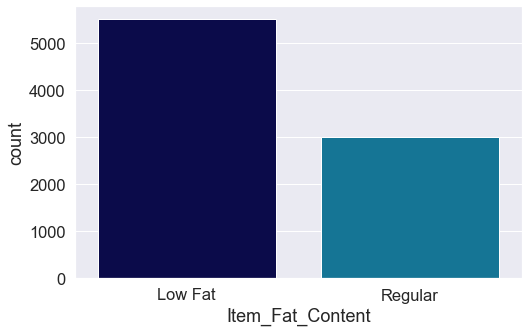

In [77]:
# We see there are some irregularities in the column and it is needed to fix them.
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

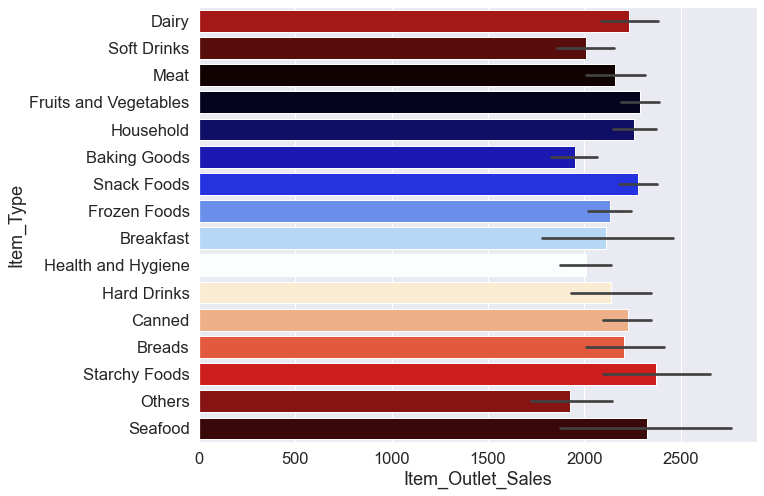

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')
#

In [79]:
train.head()
df_train=train.copy()
df_test=test.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df_train.select_dtypes(include='object').columns
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [80]:
# checking for duplicate records
train[train.duplicated(subset=None,keep='first')].count()
test[test.duplicated(subset=None,keep='first')].count()
# NO duplicates row found

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [81]:
# checking regression key assumption
# The regression has five key assumptions:
# Linear relationship.
# Multivariate normality......vif
# No or little multicollinearity.
# No auto-correlation.....
# Homoscedasticity.


In [82]:
# Seperate Features and Target
X= df_train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= df_train['Item_Outlet_Sales']
x_col=X.columns.to_list()

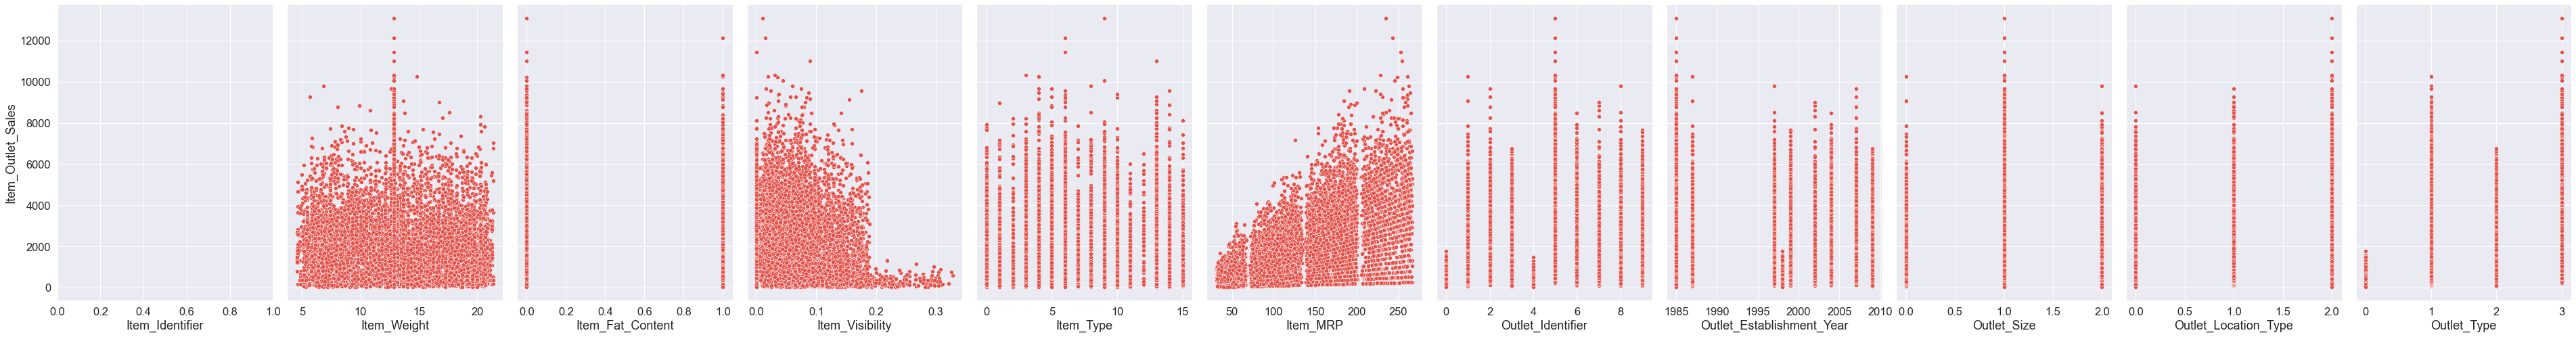

In [83]:
# 1. Linearity
# Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df_train, x_vars=x_col, y_vars='Item_Outlet_Sales', size=7, aspect=0.7)


In [84]:
# check for linear  relationship in graph
#preparation to test other realationship


In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_SC= sc.fit_transform(X)
# y=np.array(y).reshape(-1,1)
# y_sc= sc.fit_transform(y)
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


In [86]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [87]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))


R squared: 0.5106347757818097


In [88]:
# 2. Mean of Residuals

# Residuals as we know are the differences between
#  the true value and the predicted value. 
#  One of the assumptions of linear regression is
#  that the mean of the residuals should be zero. So let's find out.


residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# Very close to zero so all good here.



Mean of Residuals -7.831443739922086e-13


In [89]:
# 3. Check for Homoscedasticity
# Homoscedasticity means that the residuals have 
# equal or almost equal variance across the regression line. 
# By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

# Detecting heteroscedasticity!
# 1.Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). 
#If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot
#then heteroscedasticity is present.

# Now we will be applying tests.
# A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.


# Goldfeld Quandt Test
# Checking heteroscedasticity : Using Goldfeld Quandt
#  we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.


In [90]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
goldtest = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, goldtest)


[('F statistic', 0.9592570186404753), ('p-value', 0.8797271693253719)]

In [91]:
# Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

# Bartlett’s test tests the null hypothesis 
# that all input samples are from populations with equal variances.
# from scipy.stats import bartlett
# # following is giving error so use y_train instaed of x train need to check


F:\anaconda201903\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


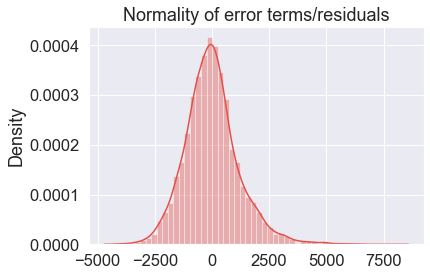

In [92]:
# 4. Check for Normality of error terms/residuals

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')



In [93]:
# The residual terms are pretty much normally distributed 
# for the number of test points we took.
#  Remember the central limit theorem which says that
#  as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.


In [94]:
# 5. No autocorrelation of residuals
# When the residuals are autocorrelated, it means that
#  the current value is dependent of the previous 
#  (historic) values and that there is 
#  a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

# In plain terms autocorrelation takes place when 
# there's a pattern in the rows of the data. 
# This is usual in time series data as there is a pattern
#  of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
# There should not be autocorrelation in the data so the error terms should not form any pattern.
 

F:\anaconda201903\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


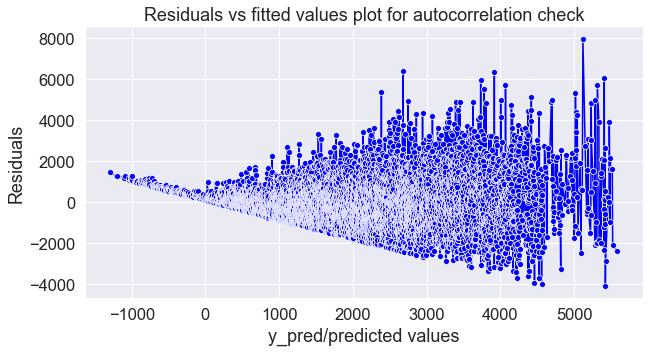

In [95]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')


In [96]:
# Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])


F:\anaconda201903\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.2584645257937863

In [97]:

# Since p value is more  than 0.05 we accept the null hypothesis
#  that error terms are not autocorrelated.


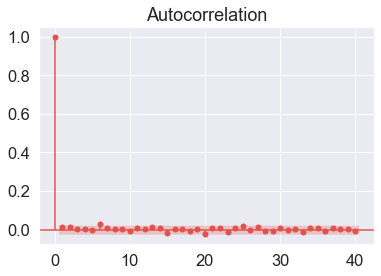

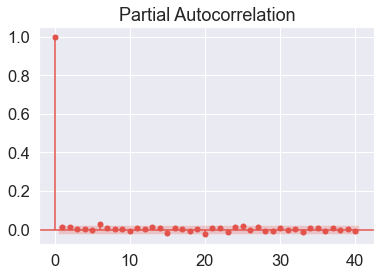

In [50]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

# The results show no  signs of autocorelation 
# since there are no spikes outside the red confidence interval region. This could be a factor of seasonality in the data.


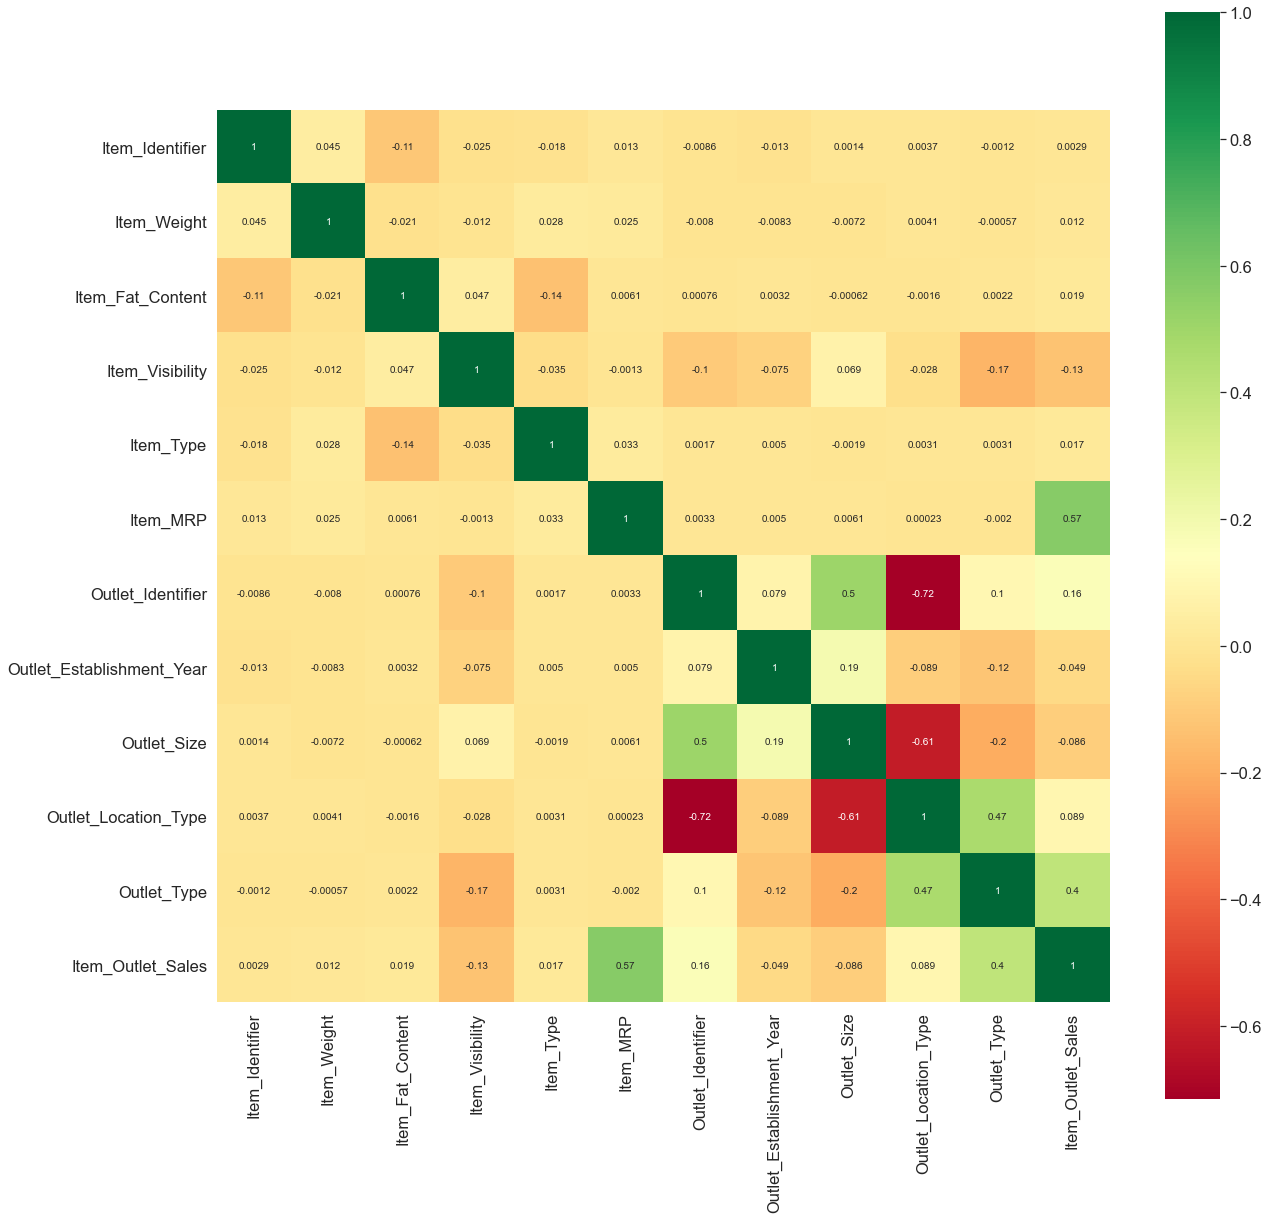

In [98]:
# 6. No perfect multicollinearity
# In regression, multicollinearity refers to the extent
 # to which independent variables are correlated.
 # Multicollinearity affects the coefficients and p-values,
 # but it does not influence the predictions, 
 # precision of the predictions, and the goodness-of-fit 
 # statistics. 
 # If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.¶

plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_train.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap


In [99]:
# Import library for VIF   checking multicolinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)


,variables,VIF
0,Item_Identifier,4.081
1,Item_Weight,10.292
2,Item_Fat_Content,1.601
3,Item_Visibility,2.777
4,Item_Type,4.041
5,Item_MRP,6.139
6,Outlet_Identifier,15.515
7,Outlet_Establishment_Year,56.915
8,Outlet_Size,7.958
9,Outlet_Location_Type,16.598


In [ ]:
# vif more than five show multicolinearity

In [104]:
X['cur_year']=2021
X['age_of_est']=X['cur_year']-X['Outlet_Establishment_Year']

In [105]:
X=X.drop(columns =['Outlet_Establishment_Year'], axis=1)

In [106]:

calc_vif(X)

,variables,VIF
0,Item_Identifier,1.018
1,Item_Weight,1.004
2,Item_Fat_Content,1.037
3,Item_Visibility,1.065
4,Item_Type,1.024
5,Item_MRP,1.002
6,Outlet_Identifier,4.149
7,Outlet_Size,1.714
8,Outlet_Location_Type,5.865
9,Outlet_Type,2.646


In [107]:
X=X.drop(columns =['cur_year'], axis=1)

In [108]:
calc_vif(X)

,variables,VIF
0,Item_Identifier,3.906
1,Item_Weight,9.036
2,Item_Fat_Content,1.568
3,Item_Visibility,2.757
4,Item_Type,3.858
5,Item_MRP,5.771
6,Outlet_Identifier,10.698
7,Outlet_Size,6.591
8,Outlet_Location_Type,9.712
9,Outlet_Type,7.556


In [109]:
X=X.drop(columns =['Outlet_Identifier'], axis=1)

In [110]:
calc_vif(X)

,variables,VIF
0,Item_Identifier,3.836
1,Item_Weight,8.495
2,Item_Fat_Content,1.554
3,Item_Visibility,2.755
4,Item_Type,3.769
5,Item_MRP,5.578
6,Outlet_Size,5.653
7,Outlet_Location_Type,4.914
8,Outlet_Type,4.487
9,age_of_est,7.352


In [ ]:
# looks more or less good